In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3
import random
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:


np.random.seed(42)

# Define the number of samples
num_samples = 50000


customer_ids = np.arange(num_samples)


ages = np.random.randint(18, 71, size=num_samples)

#Gender
genders = np.random.choice(['Male', 'Female', 'Other'], size=num_samples, p=[0.48, 0.48, 0.04])


marital_statuses = np.random.choice(['Single', 'Married', 'Divorced', 'Widowed', 'Separated'], size=num_samples, p=[0.45, 0.4, 0.1, 0.02, 0.03])

#Education Level
education_levels = np.random.choice(['High School', 'Associate Degree', 'Bachelor Degree', 'Master Degree', 'Doctorate'], size=num_samples, p=[0.3, 0.2, 0.3, 0.15, 0.05])

#Geographic Information
states = ['Florida', 'Michigan', 'New York', 'Virginia', 'Ohio', 'Illinois', 'California', 'Oregon', 'Washington', 'Pennsylvania']
geographic_info = np.random.choice(states, size=num_samples)

#Occupation
occupations = ['Entrepreneur', 'Manager', 'Salesperson', 'Engineer', 'Teacher', 'Healthcare', 'IT Professional', 'Clerk', 'Technician', 'Consultant']
occupation = np.random.choice(occupations, size=num_samples)

#Income Level
income_level = np.random.normal(loc=60000, scale=20000, size=num_samples).astype(int)
income_level = np.clip(income_level, 20000, 150000)

#Behavioral Data
behavioral_data = np.random.normal(loc=30, scale=10, size=num_samples).astype(int)
behavioral_data = np.clip(behavioral_data, 5, 120)

#Purchase History
start_date = datetime(2019, 12, 1)
end_date = datetime(2023, 12, 1)

#Generate random dates between dates
purchase_history = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_samples)]

#Insurance Products Owned
insurance_products = np.random.randint(1, 6, size=num_samples)

#Policy Type
policy_types = ['Individual', 'Family', 'Group']
policy_type = np.random.choice(policy_types, size=num_samples, p=[0.5, 0.3, 0.2])

#Customer Preferences
customer_preferences = np.random.randint(1, 6, size=num_samples)

#Preferred Communication Channel
communication_channels = ['Email', 'Phone', 'Mail', 'Text', 'Mobile App', 'Chat']
preferred_communication = np.random.choice(communication_channels, size=num_samples)

#Preferred Contact Time
contact_times = ['Morning', 'Afternoon', 'Evening', 'Anytime', 'Weekends']
preferred_contact_time = np.random.choice(contact_times, size=num_samples)

#Preferred Language
languages = ['English', 'French', 'German', 'Spanish', 'Hindi', 'Mandarin']
preferred_language = np.random.choice(languages, size=num_samples)

#Segmentation Group
segmentation_groups = ['Segment1', 'Segment2', 'Segment3', 'Segment4', 'Segment5']
segmentation_group = np.random.choice(segmentation_groups, size=num_samples)

# Create df
data = pd.DataFrame({
    'Customer ID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Marital Status': marital_statuses,
    'Education Level': education_levels,
    'Geographic Information': geographic_info,
    'Occupation': occupation,
    'Income Level': income_level,
    'Behavioral Data': behavioral_data,
    'Purchase History': purchase_history,
    'Insurance Products Owned': insurance_products,
    'Policy Type': policy_type,
    'Customer Preferences': customer_preferences,
    'Preferred Communication Channel': preferred_communication,
    'Preferred Contact Time': preferred_contact_time,
    'Preferred Language': preferred_language,
    'Segmentation Group': segmentation_group
})

#Map Insurance Products Owned
policy_names = ['policy1', 'policy2', 'policy3', 'policy4', 'policy5']
mapped_policy_names = [policy_names[i-1] for i in insurance_products]
data['Insurance Products Owned'] = mapped_policy_names

# 20. Map Insurance Products Owned to the values [1, 3, 2, 5, 4] for calculations
insurance_mapping = {1: 1, 2: 3, 3: 2, 4: 5, 5: 4}
mapped_insurance_products = [insurance_mapping[i] for i in insurance_products]

# 21. Calculate Coverage Amount using mapped values
coverage_amount = (
    500 * data['Income Level'] / 1000 +
    1000 * data['Age'] +
    20000 * np.array(mapped_insurance_products) +
    np.random.normal(0, 10000, size=num_samples)  # Adding noise
)

# 22. Calculate Premium Amount
premium_amount = (
    0.05 * coverage_amount +
    3000 * data['Education Level'].map({'High School': 1, 'Associate Degree': 2, 'Bachelor Degree': 3, 'Master Degree': 4, 'Doctorate': 5}) +
    1000 * data['Customer Preferences'] +
    np.random.normal(0, 5000, size=num_samples)  # Adding noise
)

# Assign to DataFrame
data['Coverage Amount'] = coverage_amount.astype(int)
data['Premium Amount'] = premium_amount.astype(int)

# Display the first few rows
df = data
data


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Coverage Amount,Premium Amount
0,0,56,Female,Single,Associate Degree,Virginia,Engineer,27105,33,2023-03-11,policy5,Group,2,Mail,Weekends,German,Segment1,161988,20519
1,1,69,Female,Single,High School,New York,IT Professional,68209,13,2019-12-25,policy3,Individual,4,Text,Afternoon,French,Segment2,139076,13723
2,2,46,Male,Single,Doctorate,Virginia,Clerk,61908,35,2023-10-08,policy1,Individual,5,Text,Weekends,French,Segment4,91243,29946
3,3,32,Female,Married,Bachelor Degree,California,Healthcare,51156,25,2021-03-30,policy3,Individual,2,Mobile App,Evening,English,Segment2,86950,16909
4,4,60,Male,Single,Bachelor Degree,California,IT Professional,30558,39,2022-07-24,policy3,Family,2,Mobile App,Afternoon,English,Segment2,114793,17282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,47,Female,Married,Bachelor Degree,Oregon,Salesperson,68622,42,2020-04-14,policy2,Individual,2,Phone,Weekends,Mandarin,Segment4,141306,15816
49996,49996,21,Male,Single,Bachelor Degree,Florida,Engineer,61425,24,2020-04-13,policy1,Family,5,Phone,Afternoon,Mandarin,Segment4,73080,21487
49997,49997,38,Male,Married,Bachelor Degree,California,Teacher,55035,21,2021-08-14,policy2,Family,3,Email,Morning,English,Segment2,139568,18473
49998,49998,44,Other,Single,Master Degree,Pennsylvania,Manager,115689,37,2022-04-18,policy1,Group,2,Chat,Weekends,German,Segment2,139775,16530


In [3]:
conn = sqlite3.connect('customerdba')
cursor = conn.cursor()

#Customers Table
cursor.execute('''
DROP TABLE IF EXISTS Customers;
''')
cursor.execute('''
DROP TABLE IF EXISTS CustomerPolicies;
''')
cursor.execute('''
DROP TABLE IF EXISTS CustomerPreferences;
''')
cursor.execute('''
DROP TABLE IF EXISTS InsuranceProducts;
''')
cursor.execute('''
CREATE TABLE Customers (
    CustomerID INTEGER PRIMARY KEY,
    Age INTEGER,
    Gender TEXT,
    MaritalStatus TEXT,
    EducationLevel TEXT,
    GeographicInformation TEXT,
    Occupation TEXT,
    IncomeLevel REAL,
    BehavioralData TEXT
);
''')

#CustomerPolicies Table
cursor.execute('''
CREATE TABLE CustomerPolicies (
    PolicyID INTEGER PRIMARY KEY AUTOINCREMENT,
    CustomerID INTEGER,
    PurchaseHistory TEXT,
    InsuranceProductsOwned TEXT,
    CoverageAmount REAL,
    PremiumAmount REAL,
    PolicyType TEXT,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
    FOREIGN KEY (InsuranceProductsOwned) REFERENCES InsuranceProducts(ProductName)
);
''')

#CustomerPreferences Table
cursor.execute('''
CREATE TABLE CustomerPreferences (
    PreferenceID INTEGER PRIMARY KEY AUTOINCREMENT,
    CustomerID INTEGER,
    CustomerPreferences1 INTEGER,
    PreferredCommunicationChannel TEXT,
    PreferredContactTime TEXT,
    PreferredLanguage TEXT,
    SegmentationGroup TEXT,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
);
''')

#InsuranceProducts Table
cursor.execute('''
CREATE TABLE InsuranceProducts (
    ProductName TEXT PRIMARY KEY,
    ProductDescription TEXT
);
''')

conn.commit()

In [4]:
df['Coverage Amount'] = pd.to_numeric(df['Coverage Amount'])
df['Premium Amount'] = pd.to_numeric(df['Premium Amount'])
df['Purchase History'] = pd.to_datetime(df['Purchase History'], errors='coerce').dt.strftime('%Y-%m-%d')

In [5]:
for _, row in df.iterrows():
    # Insert into Customers table
    cursor.execute('''
    INSERT INTO Customers (CustomerID, Age, Gender, MaritalStatus, EducationLevel, GeographicInformation, Occupation, IncomeLevel, BehavioralData)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['Customer ID'], row['Age'], row['Gender'], row['Marital Status'], row['Education Level'],
        row['Geographic Information'], row['Occupation'], float(row['Income Level']), row['Behavioral Data']
    ))

    # Insert into InsuranceProducts table (if needed) before inserting into CustomerPolicies
    # Ensure InsuranceProductsOwned in CustomerPolicies references ProductName
    insurance_products = {
        'policy1': 'Comprehensive health insurance covering a wide range of medical needs',
        'policy2': 'Affordable health insurance with flexible coverage options',
        'policy3': 'Premium health insurance offering extensive benefits and services',
        'policy4': 'Reliable health insurance designed for long-term healthcare security',
        'policy5': 'Specialized health insurance tailored to meet unique individual needs'
    }

    # Check and insert insurance product based on row['Insurance Products Owned']
    if row['Insurance Products Owned'] in insurance_products:
        product_name = row['Insurance Products Owned']
        product_description = insurance_products[product_name]

        cursor.execute('''
        INSERT OR IGNORE INTO InsuranceProducts (ProductName, ProductDescription)
        VALUES (?, ?)
        ''', (product_name, product_description))

    # Insert into CustomerPolicies table
    cursor.execute('''
    INSERT INTO CustomerPolicies (CustomerID, PurchaseHistory, InsuranceProductsOwned, CoverageAmount, PremiumAmount, PolicyType)
    VALUES (?, ?, ?, ?, ?, ?)
    ''', (
        row['Customer ID'], row['Purchase History'], row['Insurance Products Owned'],
        row['Coverage Amount'], row['Premium Amount'], row['Policy Type']
    ))

    # Insert into CustomerPreferences table
    cursor.execute('''
    INSERT INTO CustomerPreferences (CustomerID, CustomerPreferences1, PreferredCommunicationChannel, PreferredContactTime, PreferredLanguage, SegmentationGroup)
    VALUES (?, ?, ?, ?, ?, ?)
    ''', (
        row['Customer ID'], row['Customer Preferences'], row['Preferred Communication Channel'], row['Preferred Contact Time'],
        row['Preferred Language'], row['Segmentation Group']
    ))
# Commit the changes and close the connection
conn.commit()

In [6]:
incomeGrouping = """
SELECT
    CustomerID, Age, Gender, IncomeLevel,MaritalStatus,EducationLevel,
    CASE
        WHEN IncomeLevel > (SELECT AVG(IncomeLevel) FROM Customers) THEN 'Above Average'
        ELSE 'Below Average'
    END AS Income_Group
FROM Customers;"""

iG = pd.read_sql_query(incomeGrouping, conn)
iG

,CustomerID,Age,Gender,IncomeLevel,MaritalStatus,EducationLevel,Income_Group
0,0,56,Female,27105.0,Single,Associate Degree,Below Average
1,1,69,Female,68209.0,Single,High School,Above Average
2,2,46,Male,61908.0,Single,Doctorate,Above Average
3,3,32,Female,51156.0,Married,Bachelor Degree,Below Average
4,4,60,Male,30558.0,Single,Bachelor Degree,Below Average
...,...,...,...,...,...,...,...
49995,49995,47,Female,68622.0,Married,Bachelor Degree,Above Average
49996,49996,21,Male,61425.0,Single,Bachelor Degree,Above Average
49997,49997,38,Male,55035.0,Married,Bachelor Degree,Below Average
49998,49998,44,Other,115689.0,Single,Master Degree,Above Average


In [7]:
highValueCustomers = """
SELECT c.Age,c.Gender,c.MaritalStatus,c.Occupation,c.IncomeLevel,cp.PolicyType,cp.CoverageAmount,cp.PremiumAmount,p.PreferredCommunicationChannel,p.PreferredLanguage
FROM
    Customers c
JOIN
    CustomerPolicies cp ON c.CustomerID = cp.CustomerID
JOIN
    CustomerPreferences p ON c.CustomerID = p.CustomerID
ORDER BY
    cp.CoverageAmount DESC, c.IncomeLevel DESC
LIMIT 10;"""
hVC = pd.read_sql_query(highValueCustomers, conn)
hVC

,Age,Gender,MaritalStatus,Occupation,IncomeLevel,PolicyType,CoverageAmount,PremiumAmount,PreferredCommunicationChannel,PreferredLanguage
0,68,Male,Single,IT Professional,93455.0,Group,244350.0,25207.0,Phone,Mandarin
1,65,Female,Single,Engineer,109057.0,Individual,243183.0,36007.0,Chat,English
2,67,Male,Married,Engineer,87613.0,Family,242677.0,25584.0,Text,French
3,66,Female,Married,Manager,90144.0,Family,241462.0,15574.0,Text,Mandarin
4,54,Female,Single,Teacher,110391.0,Individual,240036.0,29191.0,Mail,French
5,64,Male,Single,Clerk,95232.0,Individual,238074.0,13938.0,Email,English
6,69,Female,Single,IT Professional,97617.0,Individual,235996.0,29592.0,Chat,German
7,68,Male,Single,Consultant,89382.0,Individual,234765.0,22656.0,Mobile App,Mandarin
8,69,Female,Separated,Salesperson,102289.0,Family,234619.0,27168.0,Chat,English
9,69,Female,Single,IT Professional,86858.0,Group,234486.0,9199.0,Mail,Hindi


In [8]:
sg = """SELECT p.SegmentationGroup, cp.PolicyType, COUNT(cp.PolicyID) AS policyCount
FROM CustomerPreferences p
JOIN CustomerPolicies cp ON p.CustomerID = cp.CustomerID
GROUP BY p.SegmentationGroup, cp.PolicyType"""
sg = pd.read_sql_query(sg, conn)
sg

,SegmentationGroup,PolicyType,policyCount
0,Segment1,Family,3015
1,Segment1,Group,2036
2,Segment1,Individual,5025
3,Segment2,Family,2960
4,Segment2,Group,2022
5,Segment2,Individual,4942
6,Segment3,Family,3055
7,Segment3,Group,1993
8,Segment3,Individual,4842
9,Segment4,Family,3002


In [9]:
query = '''
SELECT
    c.CustomerID AS "Customer ID",
    c.Age,
    c.Gender,
    c.MaritalStatus AS "Marital Status",
    c.EducationLevel AS "Education Level",
    c.GeographicInformation AS "Geographic Information",
    c.Occupation,
    c.IncomeLevel AS "Income Level",
    c.BehavioralData AS "Behavioral Data",
    cp.PurchaseHistory AS "Purchase History",
    cp.InsuranceProductsOwned AS "Insurance Products Owned",
    cp.CoverageAmount AS "Coverage Amount",
    cp.PremiumAmount AS "Premium Amount",
    cp.PolicyType AS "Policy Type",
    cr.CustomerPreferences1 AS "Customer Preferences",
    cr.PreferredCommunicationChannel AS "Preferred Communication Channel",
    cr.PreferredContactTime AS "Preferred Contact Time",
    cr.PreferredLanguage AS "Preferred Language",
    cr.SegmentationGroup AS "Segmentation Group"
FROM
    Customers c
LEFT JOIN
    CustomerPolicies cp ON c.CustomerID = cp.CustomerID
LEFT JOIN
    CustomerPreferences cr ON c.CustomerID = cr.CustomerID;
'''


df1 = pd.read_sql_query(query, conn)
df1

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,0,56,Female,Single,Associate Degree,Virginia,Engineer,27105.0,33,2023-03-11,policy5,161988.0,20519.0,Group,2,Mail,Weekends,German,Segment1
1,1,69,Female,Single,High School,New York,IT Professional,68209.0,13,2019-12-25,policy3,139076.0,13723.0,Individual,4,Text,Afternoon,French,Segment2
2,2,46,Male,Single,Doctorate,Virginia,Clerk,61908.0,35,2023-10-08,policy1,91243.0,29946.0,Individual,5,Text,Weekends,French,Segment4
3,3,32,Female,Married,Bachelor Degree,California,Healthcare,51156.0,25,2021-03-30,policy3,86950.0,16909.0,Individual,2,Mobile App,Evening,English,Segment2
4,4,60,Male,Single,Bachelor Degree,California,IT Professional,30558.0,39,2022-07-24,policy3,114793.0,17282.0,Family,2,Mobile App,Afternoon,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,47,Female,Married,Bachelor Degree,Oregon,Salesperson,68622.0,42,2020-04-14,policy2,141306.0,15816.0,Individual,2,Phone,Weekends,Mandarin,Segment4
49996,49996,21,Male,Single,Bachelor Degree,Florida,Engineer,61425.0,24,2020-04-13,policy1,73080.0,21487.0,Family,5,Phone,Afternoon,Mandarin,Segment4
49997,49997,38,Male,Married,Bachelor Degree,California,Teacher,55035.0,21,2021-08-14,policy2,139568.0,18473.0,Family,3,Email,Morning,English,Segment2
49998,49998,44,Other,Single,Master Degree,Pennsylvania,Manager,115689.0,37,2022-04-18,policy1,139775.0,16530.0,Group,2,Chat,Weekends,German,Segment2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Customer ID                      50000 non-null  int64 
 1   Age                              50000 non-null  int64 
 2   Gender                           50000 non-null  object
 3   Marital Status                   50000 non-null  object
 4   Education Level                  50000 non-null  object
 5   Geographic Information           50000 non-null  object
 6   Occupation                       50000 non-null  object
 7   Income Level                     50000 non-null  int64 
 8   Behavioral Data                  50000 non-null  int64 
 9   Purchase History                 50000 non-null  object
 10  Insurance Products Owned         50000 non-null  object
 11  Policy Type                      50000 non-null  object
 12  Customer Preferences            

In [11]:
df.shape

(50000, 19)

In [12]:
df.describe()

,Customer ID,Age,Income Level,Behavioral Data,Customer Preferences,Coverage Amount,Premium Amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,44.002820,60171.421500,29.497640,2.995020,134349.817140,17102.443900
std,14433.901067,15.269871,19561.071455,9.913726,1.413901,34991.679663,6552.943986
min,0.000000,18.000000,20000.000000,5.000000,1.000000,22499.000000,-6579.000000
25%,12499.750000,31.000000,46543.500000,23.000000,2.000000,108392.000000,12601.000000
50%,24999.500000,44.000000,60017.500000,29.000000,3.000000,134284.500000,17004.000000
75%,37499.250000,57.000000,73437.750000,36.000000,4.000000,160341.000000,21548.000000
max,49999.000000,70.000000,147236.000000,71.000000,5.000000,244350.000000,47607.000000


In [13]:
df.isnull().sum()

Customer ID                        0
Age                                0
Gender                             0
Marital Status                     0
Education Level                    0
Geographic Information             0
Occupation                         0
Income Level                       0
Behavioral Data                    0
Purchase History                   0
Insurance Products Owned           0
Policy Type                        0
Customer Preferences               0
Preferred Communication Channel    0
Preferred Contact Time             0
Preferred Language                 0
Segmentation Group                 0
Coverage Amount                    0
Premium Amount                     0
dtype: int64

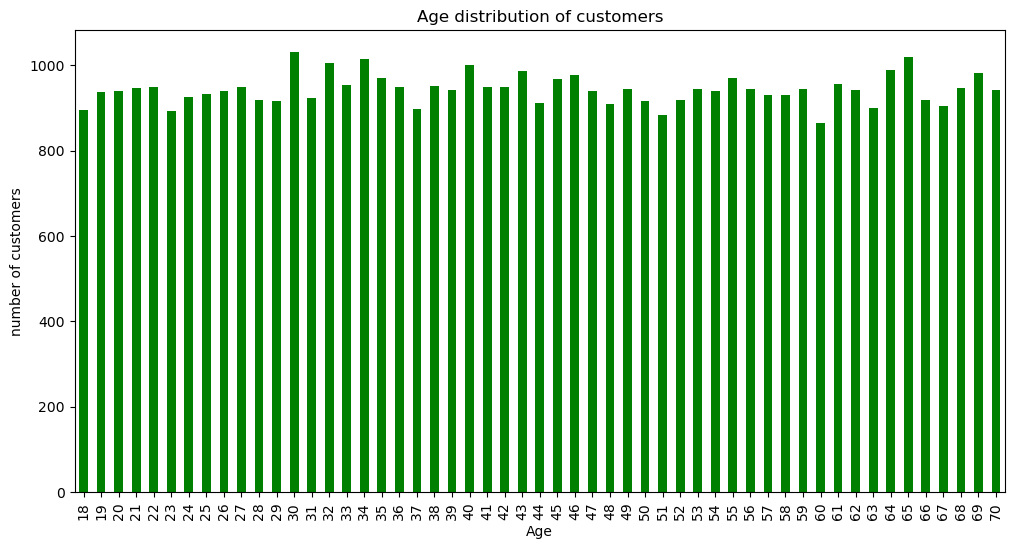

In [14]:
age_distribution= df['Age'].value_counts().sort_index()
plt.figure(figsize=(12,6))
age_distribution.plot(kind='bar', color='green')
plt.title('Age distribution of customers')
plt.xlabel('Age')
plt.ylabel('number of customers')
plt.show()

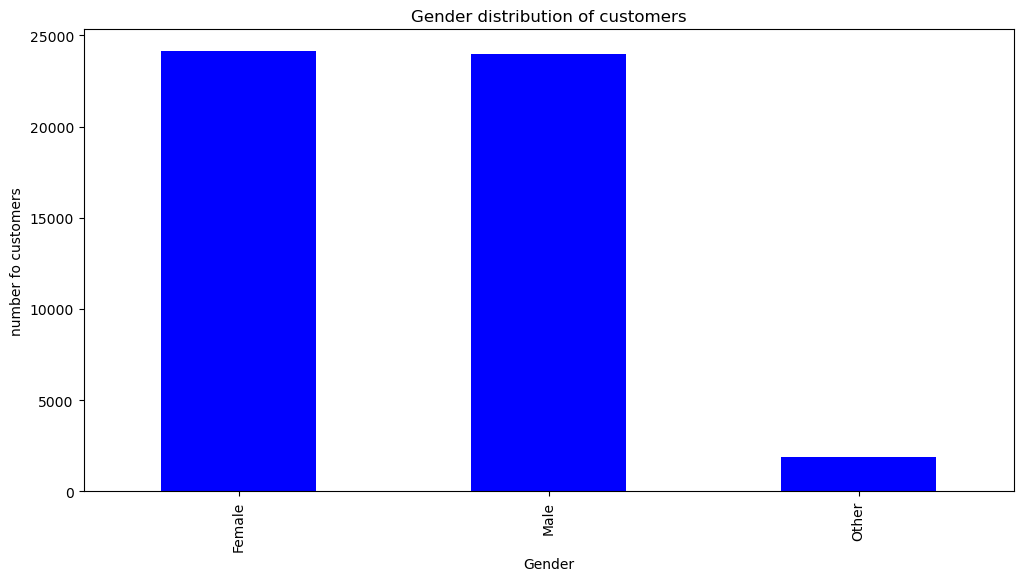

In [15]:
gender_distribution=df['Gender'].value_counts().sort_index()
plt.figure(figsize=(12,6))
gender_distribution.plot(kind='bar', color='blue')
plt.title('Gender distribution of customers')
plt.xlabel('Gender')
plt.ylabel('number fo customers')
plt.show()

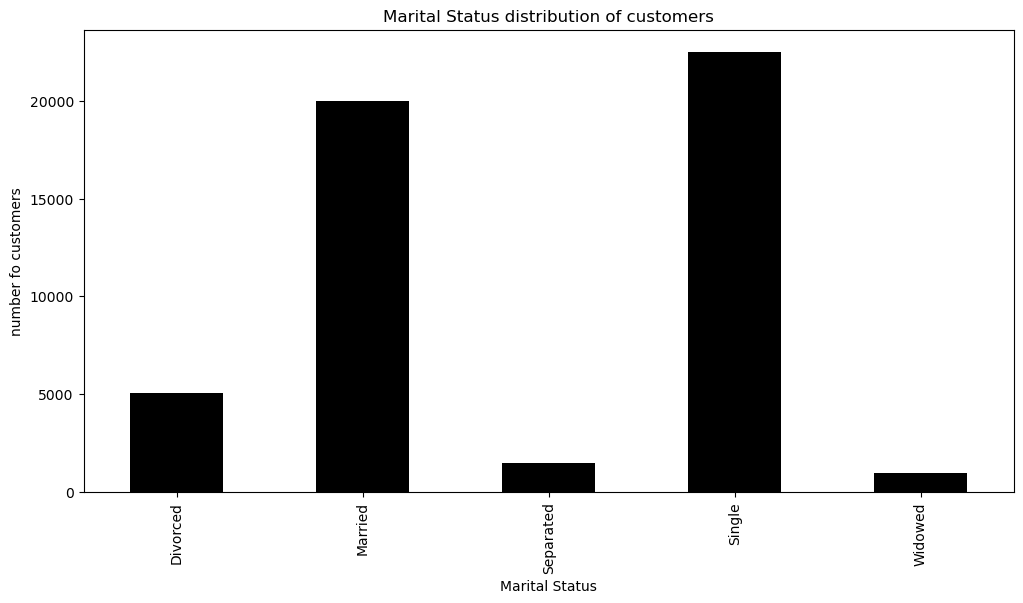

In [16]:
marital_status_distribution=df['Marital Status'].value_counts().sort_index()
plt.figure(figsize=(12,6))
marital_status_distribution.plot(kind='bar', color='black')
plt.title('Marital Status distribution of customers')
plt.xlabel('Marital Status')
plt.ylabel('number fo customers')
plt.show()

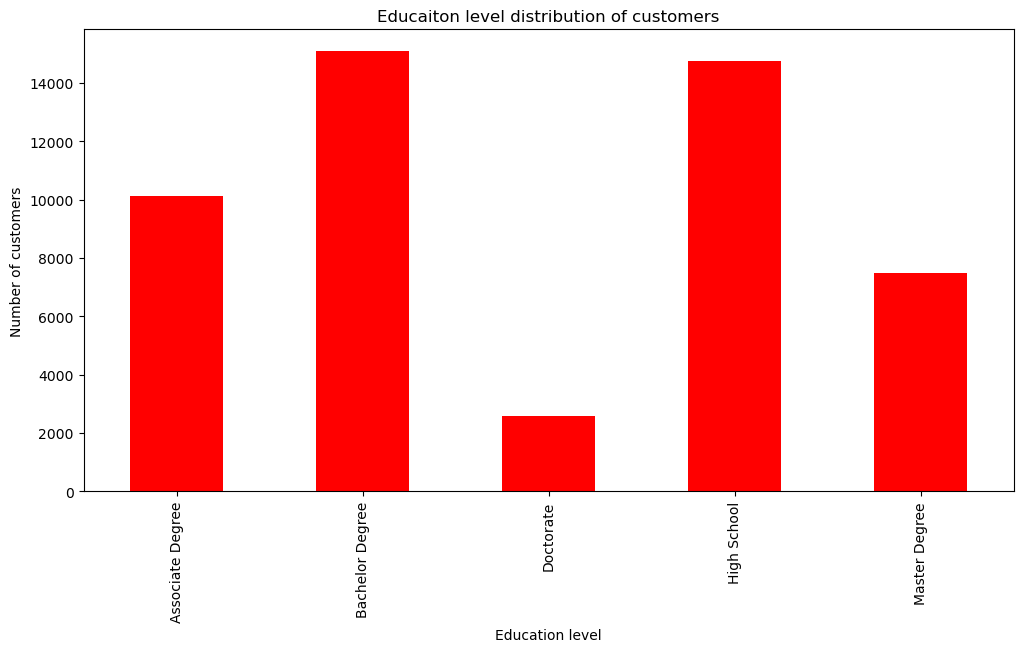

In [17]:
education_distribution=df['Education Level'].value_counts().sort_index()
plt.figure(figsize=(12,6))
education_distribution.plot(kind='bar', color='red')
plt.title('Educaiton level distribution of customers')
plt.xlabel('Education level')
plt.ylabel('Number of customers')
plt.show()

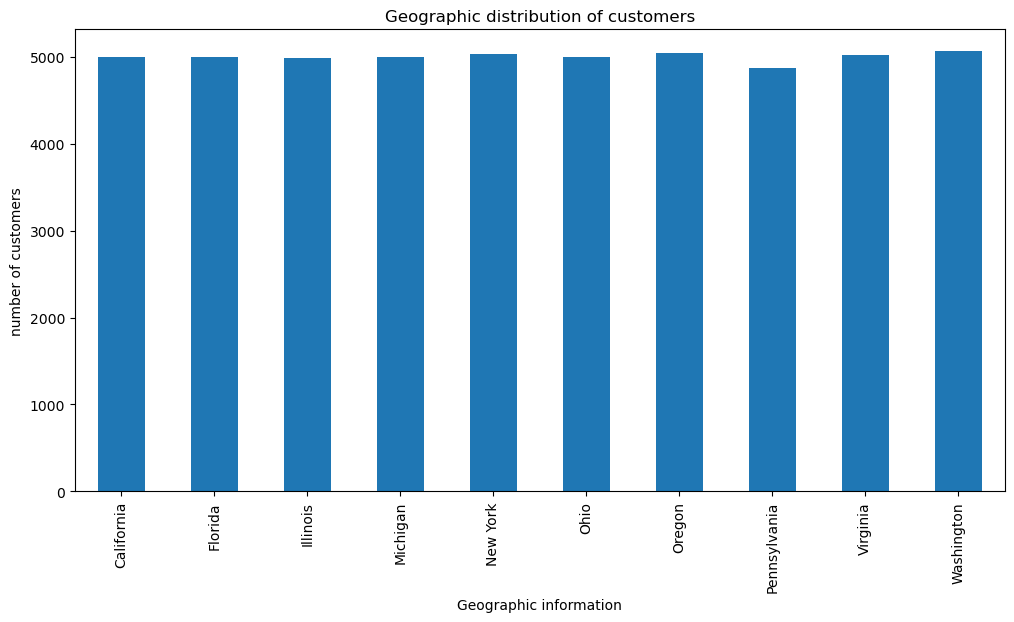

In [18]:
geo_distribution=df['Geographic Information'].value_counts().sort_index()
plt.figure(figsize=(12,6))
geo_distribution.plot(kind='bar')
plt.title('Geographic distribution of customers')
plt.xlabel('Geographic information')
plt.ylabel('number of customers')
plt.show()

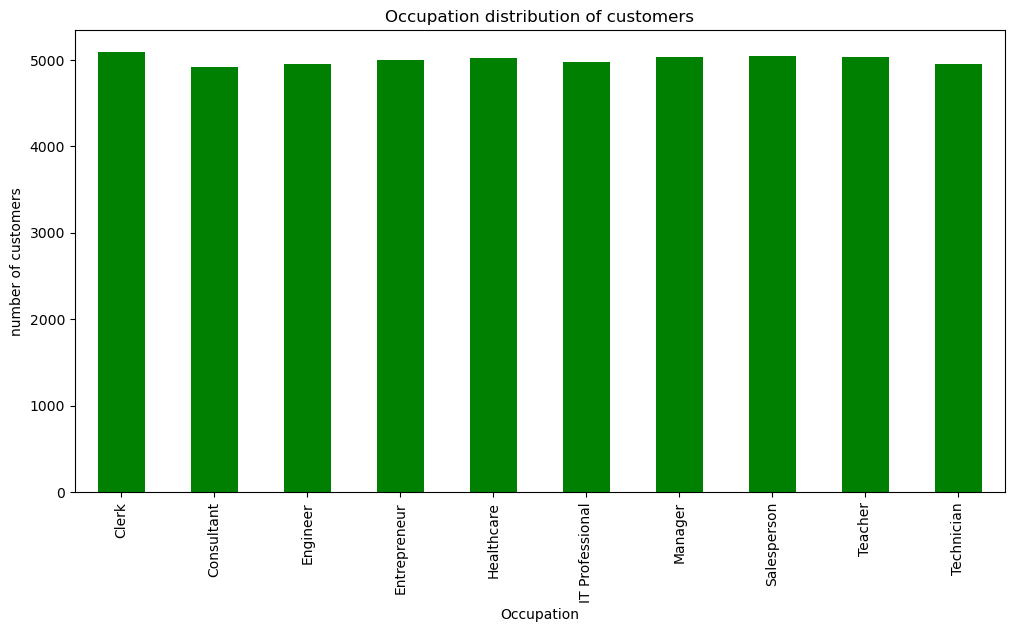

In [19]:
age_distribution= df['Occupation'].value_counts().sort_index()
plt.figure(figsize=(12,6))
age_distribution.plot(kind='bar', color='green')
plt.title('Occupation distribution of customers')
plt.xlabel('Occupation')
plt.ylabel('number of customers')
plt.show()

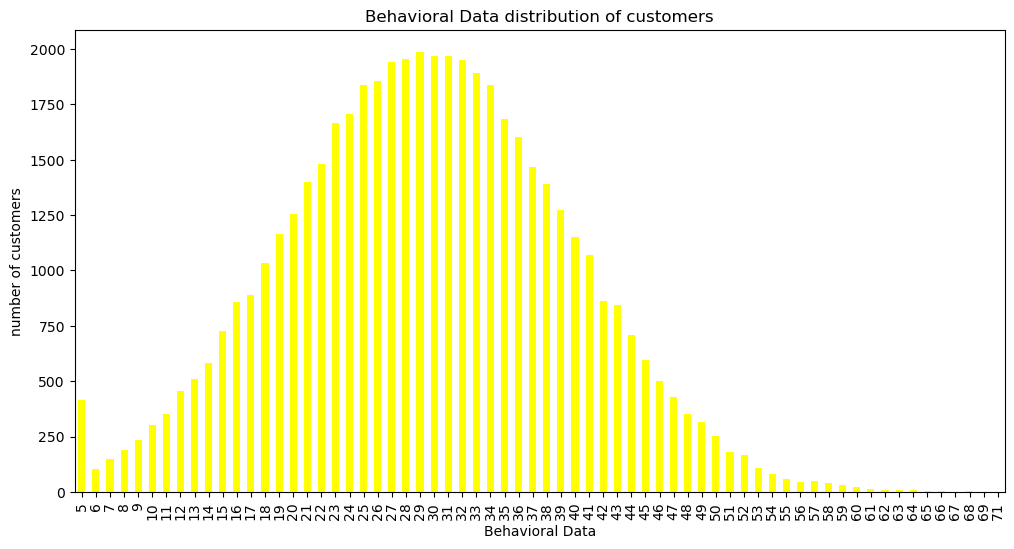

In [20]:
age_distribution= df['Behavioral Data'].value_counts().sort_index()
plt.figure(figsize=(12,6))
age_distribution.plot(kind='bar', color='yellow')
plt.title('Behavioral Data distribution of customers')
plt.xlabel('Behavioral Data')
plt.ylabel('number of customers')
plt.show()

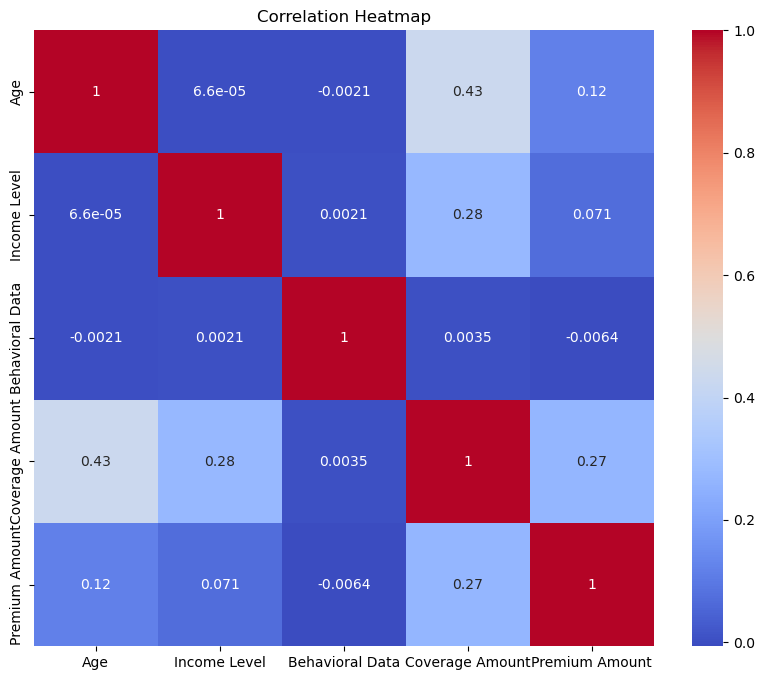

In [21]:
numerical_columns = ['Age', 'Income Level', 'Behavioral Data', 'Coverage Amount', 'Premium Amount']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

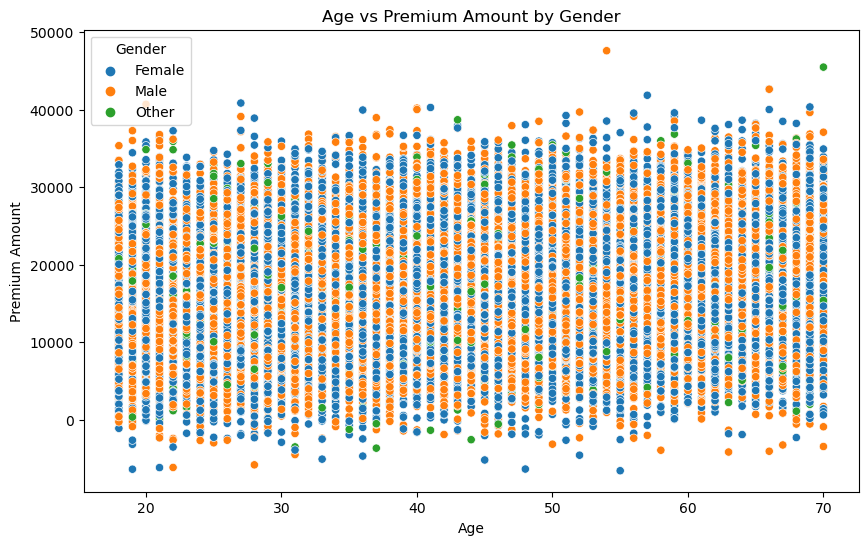

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Premium Amount', hue='Gender', data=df)
plt.title("Age vs Premium Amount by Gender")
plt.show()

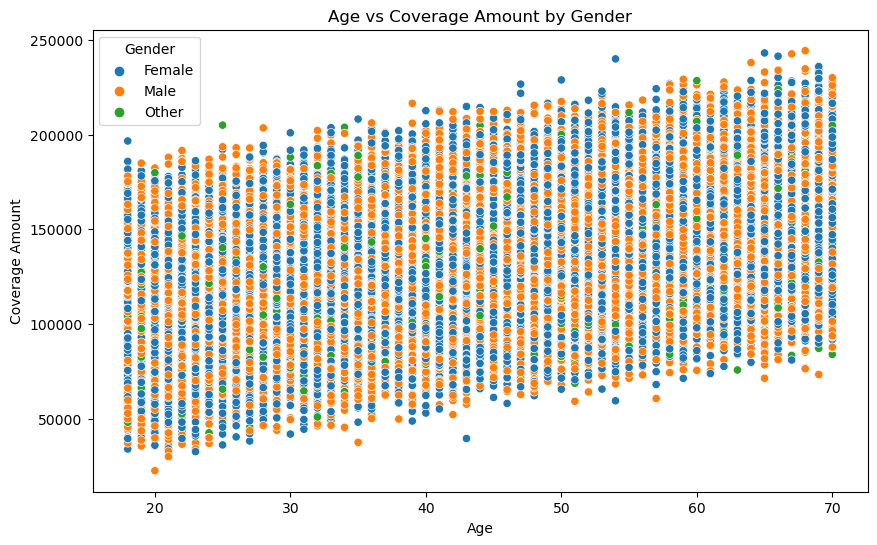

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Coverage Amount', hue='Gender', data=df)
plt.title("Age vs Coverage Amount by Gender")
plt.show()

In [24]:
# Conclusion

# In summary, this exploratory data analysis (EDA) provided insights into the customer segmentation dataset.
# Visualizations revealed the distribution of key demographic and behavioral characteristics, including age, gender, marital status, education level, geographic location, occupation, and behavioral data.
# These visualizations highlight potential customer segments based on these characteristics, laying the groundwork for more advanced segmentation techniques like clustering or classification algorithms.
# Further analysis could focus on correlations between these features and customer spending habits, product preferences, or other relevant metrics to refine segmentation strategies and improve targeted marketing efforts.
# The identified customer segments can inform business decisions around product development, marketing campaigns, and customer relationship management.

In [25]:
clean_df = df.copy()

# Ensure 'Purchase History' is in datetime format and convert it to number of days
clean_df['Purchase History'] = pd.to_datetime(clean_df['Purchase History'], errors='coerce')
start_date = datetime(2019, 12, 1)
clean_df['Purchase History'] = (clean_df['Purchase History'] - start_date).dt.days

# Features and Targets
X = clean_df.drop(['Customer ID', 'Coverage Amount', 'Premium Amount'], axis=1)
y_coverage = clean_df['Coverage Amount']
y_premium = clean_df['Premium Amount']

# One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [26]:
# Coverage Amount
X_train_cov, X_test_cov, y_train_cov, y_test_cov = train_test_split(
    X_scaled, y_coverage, test_size=0.2, random_state=42
)

# Premium Amount
X_train_prem, X_test_prem, y_train_prem, y_test_prem = train_test_split(
    X_scaled, y_premium, test_size=0.2, random_state=42
)

In [27]:
# Initialize models
linear_reg_cov = LinearRegression()
random_forest_cov = RandomForestRegressor(random_state=42, n_estimators=100)

linear_reg_prem = LinearRegression()
random_forest_prem = RandomForestRegressor(random_state=42, n_estimators=100)

# Train models for Coverage Amount
linear_reg_cov.fit(X_train_cov, y_train_cov)
random_forest_cov.fit(X_train_cov, y_train_cov)

# Train models for Premium Amount
linear_reg_prem.fit(X_train_prem, y_train_prem)
random_forest_prem.fit(X_train_prem, y_train_prem)

RandomForestRegressor(random_state=42)

In [28]:

# Coverage Amount Prediction
print("\n--- Coverage Amount Prediction ---")
y_pred_cov_lr = linear_reg_cov.predict(X_test_cov)
mse_cov_lr = mean_squared_error(y_test_cov, y_pred_cov_lr)
r2_cov_lr = r2_score(y_test_cov, y_pred_cov_lr)
print(f"Linear Regression - MSE: {mse_cov_lr:.2f}, R²: {r2_cov_lr:.4f}")

y_pred_cov_rf = random_forest_cov.predict(X_test_cov)
mse_cov_rf = mean_squared_error(y_test_cov, y_pred_cov_rf)
r2_cov_rf = r2_score(y_test_cov, y_pred_cov_rf)
print(f"Random Forest - MSE: {mse_cov_rf:.2f}, R²: {r2_cov_rf:.4f}")

# Storing results
results_cov = {
    "Linear Regression": {"MSE": mse_cov_lr, "R²": r2_cov_lr},
    "Random Forest": {"MSE": mse_cov_rf, "R²": r2_cov_rf},
}

# Premium Amount Prediction
print("\n--- Premium Amount Prediction ---")
y_pred_prem_lr = linear_reg_prem.predict(X_test_prem)
mse_prem_lr = mean_squared_error(y_test_prem, y_pred_prem_lr)
r2_prem_lr = r2_score(y_test_prem, y_pred_prem_lr)
print(f"Linear Regression - MSE: {mse_prem_lr:.2f}, R²: {r2_prem_lr:.4f}")

y_pred_prem_rf = random_forest_prem.predict(X_test_prem)
mse_prem_rf = mean_squared_error(y_test_prem, y_pred_prem_rf)
r2_prem_rf = r2_score(y_test_prem, y_pred_prem_rf)
print(f"Random Forest - MSE: {mse_prem_rf:.2f}, R²: {r2_prem_rf:.4f}")

# Storing results
results_prem = {
    "Linear Regression": {"MSE": mse_prem_lr, "R²": r2_prem_lr},
    "Random Forest": {"MSE": mse_prem_rf, "R²": r2_prem_rf},
}


--- Coverage Amount Prediction ---
Linear Regression - MSE: 100976979.74, R²: 0.9174
Random Forest - MSE: 108438688.99, R²: 0.9113

--- Premium Amount Prediction ---
Linear Regression - MSE: 25160263.62, R²: 0.4134
Random Forest - MSE: 26707554.81, R²: 0.3774


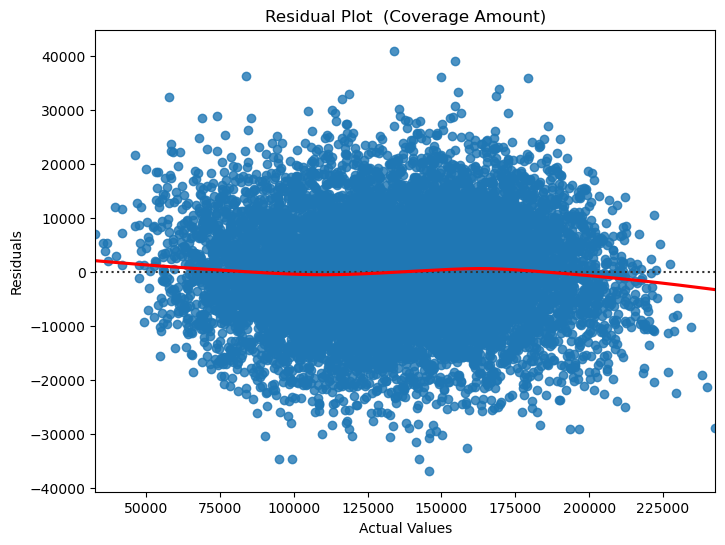



--- Feature Importance (Coefficients) for Linear Regression (Coverage Amount) ---
Insurance Products Owned_policy4    32174.619549
Insurance Products Owned_policy5    24007.117539
Insurance Products Owned_policy2    15912.459447
Age                                 15191.300682
Income Level                         9789.253432
Insurance Products Owned_policy3     7956.700729
Segmentation Group_Segment4           126.649201
Education Level_Doctorate              60.133968
Purchase History                       54.493874
Preferred Language_French              45.779282
dtype: float64


--- Feature Importance for Coverage Amount ---
Insurance Products Owned_policy4    0.329201
Age                                 0.194963
Insurance Products Owned_policy5    0.192148
Insurance Products Owned_policy2    0.096163
Income Level                        0.091833
Insurance Products Owned_policy3    0.031783
Purchase History                    0.010427
Behavioral Data                     0.008461
Cu

In [29]:

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test_cov, y=y_pred_cov_rf, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot  (Coverage Amount)")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# Feature Importance for Linear Regression (Coverage Amount)
coef_cov_lr = pd.Series(
    linear_reg_cov.coef_, index=X_encoded.columns
).sort_values(ascending=False)
print('\n')
print("--- Feature Importance (Coefficients) for Linear Regression (Coverage Amount) ---")
print(coef_cov_lr.head(10))

# Feature Importance for Random Forest
rf_cov = RandomForestRegressor(random_state=42, n_estimators=100)
rf_cov.fit(X_train_cov, y_train_cov)
importances_cov = pd.Series(rf_cov.feature_importances_, index=X_encoded.columns)
print('\n')
print("--- Feature Importance for Coverage Amount ---")
print(importances_cov.sort_values(ascending=False).head(10))

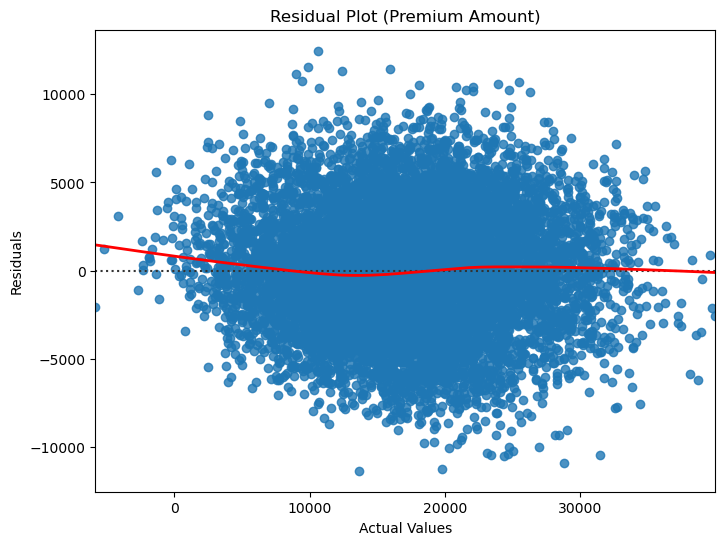



--- Feature Importance (Coefficients) for Linear Regression (Premium Amount) ---
Education Level_Master Degree       2132.873286
Education Level_Doctorate           2002.940888
Insurance Products Owned_policy4    1591.815069
Customer Preferences                1433.439288
Education Level_Bachelor Degree     1421.579612
Insurance Products Owned_policy5    1139.383327
Age                                  775.560994
Insurance Products Owned_policy2     744.116035
Income Level                         511.741492
Insurance Products Owned_policy3     370.683479
dtype: float64


--- Feature Importance for Premium Amount ---
Education Level_High School         0.185586
Income Level                        0.090913
Purchase History                    0.080468
Age                                 0.073526
Behavioral Data                     0.063496
Customer Preferences                0.054701
Education Level_Master Degree       0.044770
Education Level_Doctorate           0.044672
Education Leve

In [30]:
# Use the predictions from Random Forest for residual plot
y_pred_prem = y_pred_prem_rf  # Replace with y_pred_prem_lr if you want Linear Regression predictions

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test_prem, y=y_pred_prem, lowess=True, line_kws={"color": "red", "lw": 2})
plt.title("Residual Plot (Premium Amount)")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# Feature Importance for Linear Regression (Premium Amount)
coef_prem_lr = pd.Series(
    linear_reg_prem.coef_, index=X_encoded.columns
).sort_values(ascending=False)

print('\n')
print("--- Feature Importance (Coefficients) for Linear Regression (Premium Amount) ---")
print(coef_prem_lr.head(10))

# Feature Importance for Random Forest
rf_prem = RandomForestRegressor(random_state=42, n_estimators=100)
rf_prem.fit(X_train_prem, y_train_prem)
importances_prem = pd.Series(rf_prem.feature_importances_, index=X_encoded.columns)
print('\n')
print("--- Feature Importance for Premium Amount ---")
print(importances_prem.sort_values(ascending=False).head(10))